<a href="https://colab.research.google.com/github/MateusFBL/Portfolio-cientista-de-dados/blob/main/TCCpronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa 1: Montar o Google Drive no Colab


In [ ]:
# Montar o Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


#Etapa  2: Importar Bibliotecas Necessárias


In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

#3: Carregar Arquivos CSV com Codificação Correta

In [ ]:
# Carregar arquivos CSV com o delimitador correto e a codificação específica
alvos_furto = pd.read_csv('/content/drive/MyDrive/Tcc/Banco Alvos de Furto - Atualizado Setembro 2024.csv', encoding='ISO-8859-1', delimiter=';')
alvos_roubo = pd.read_csv('/content/drive/MyDrive/Tcc/Banco Alvos de Roubo - Atualizado Setembro 2024.csv', encoding='ISO-8859-1', delimiter=';')
crimes_violentos_2018_2023 = pd.read_csv('/content/drive/MyDrive/Tcc/Banco Crimes Violentos - 2018-2023.csv', encoding='ISO-8859-1', delimiter=';')
crimes_violentos_2024 = pd.read_csv('/content/drive/MyDrive/Tcc/Banco Crimes Violentos - Atualizado Setembro 2024.csv', encoding='ISO-8859-1', delimiter=';')
outras_naturezas = pd.read_csv('/content/drive/MyDrive/Tcc/Banco Outras Naturezas - Atualizado Setembro 2024.csv', encoding='ISO-8859-1', delimiter=';')
veiculos_furtados = pd.read_csv('/content/drive/MyDrive/Tcc/Banco Veculos Furtados - Atualizado Setembro 2024 (1).csv', encoding='ISO-8859-1', delimiter=';')
vitimas_homicidio = pd.read_csv('/content/drive/MyDrive/Tcc/Banco Vtimas de Homicdio Consumado Setembro 2024.csv', encoding='ISO-8859-1', delimiter=';')


#4: Preparar a Coluna Data e Padronizar Nomes de Colunas

In [ ]:
# Função para preparar a coluna 'Data' e padronizar nomes de colunas
def preparar_dataset(dataset):
    dataset.columns = dataset.columns.str.strip()  # Remover espaços dos nomes das colunas
    if 'Ano' in dataset.columns and 'Mês' in dataset.columns:
        dataset['Data'] = pd.to_datetime(dataset['Ano'].astype(str) + '-' + dataset['Mês'].astype(str) + '-01', errors='coerce')
    return dataset

# Aplicar a função em todos os datasets
alvos_furto = preparar_dataset(alvos_furto)
alvos_roubo = preparar_dataset(alvos_roubo)
crimes_violentos_2018_2023 = preparar_dataset(crimes_violentos_2018_2023)
crimes_violentos_2024 = preparar_dataset(crimes_violentos_2024)
outras_naturezas = preparar_dataset(outras_naturezas)
veiculos_furtados = preparar_dataset(veiculos_furtados)
vitimas_homicidio = preparar_dataset(vitimas_homicidio)


# 5: Combinar os Dados de Crimes Violentos de Diferentes Períodos

In [ ]:
# Combinar os dados de crimes violentos de diferentes períodos
crimes_violentos = pd.concat([crimes_violentos_2018_2023, crimes_violentos_2024], ignore_index=True)



# 6: Criar uma lista que inclui todos os datasets carregados

In [ ]:
datasets = [alvos_furto, alvos_roubo, crimes_violentos_2018_2023, crimes_violentos_2024, outras_naturezas, veiculos_furtados, vitimas_homicidio]


# 7 : Tratar Valores Ausentes e Remover Duplicatas

In [ ]:
# Tratamento de valores ausentes e duplicados em todos os datasets
for dataset in datasets:
    # Exibe valores ausentes
    print(dataset.isnull().sum())
    # Remover duplicatas
    dataset.drop_duplicates(inplace=True)


Registros    0
Natureza     0
Alvos        0
Município    0
Cod IBGE     0
Mês          0
Ano          0
RISP         0
RISP Nova    0
RMBH         0
Data         0
dtype: int64
Registros    0
Natureza     0
Alvos        0
Município    0
Cod IBGE     0
Mês          0
Ano          0
RISP         0
RISP Nova    0
RMBH         0
Data         0
dtype: int64
Registros    0
Natureza     0
Município    0
Cod IBGE     0
Mês          0
Ano          0
RISP         0
RISP Nova    0
RMBH         0
Data         0
dtype: int64
Registros    0
Natureza     0
Município    0
Cod IBGE     0
Mês          0
Ano          0
RISP         0
RISP Nova    0
RMBH         0
Data         0
dtype: int64
Registros    0
Natureza     0
Município    0
Cod. IBGE    0
Mês          0
Ano          0
RISP         0
RISP Nova    0
RMBH         0
Data         0
dtype: int64
Registros    0
Natureza     0
Alvos        0
Município    0
Cod IBGE     0
Mês          0
Ano          0
RISP         0
RISP Nova    0
RMBH         0
Data 

#8: Selecionar e Padronizar Colunas Essenciais em Cada Dataset

In [ ]:
# Selecionar e padronizar colunas essenciais em cada dataset, incluindo 'Registros'
alvos_furto_selecao = alvos_furto[['Data', 'Município', 'Natureza', 'RISP', 'Registros']].copy()
alvos_furto_selecao['Tipo de Crime'] = 'Furto'

alvos_roubo_selecao = alvos_roubo[['Data', 'Município', 'Natureza', 'RISP', 'Registros']].copy()
alvos_roubo_selecao['Tipo de Crime'] = 'Roubo'

crimes_violentos_selecao = crimes_violentos[['Data', 'Município', 'Natureza', 'RISP', 'Registros']].copy()
crimes_violentos_selecao['Tipo de Crime'] = 'Violento'

outras_naturezas_selecao = outras_naturezas[['Data', 'Município', 'Natureza', 'RISP', 'Registros']].copy()
outras_naturezas_selecao['Tipo de Crime'] = 'Outros'

veiculos_furtados_selecao = veiculos_furtados[['Data', 'Município', 'Natureza', 'RISP', 'Registros']].copy()
veiculos_furtados_selecao['Tipo de Crime'] = 'Veículo Furtado'

vitimas_homicidio_selecao = vitimas_homicidio[['Data', 'Município', 'Natureza', 'RISP', 'Registros']].copy()
vitimas_homicidio_selecao['Tipo de Crime'] = 'Homicídio'


# 9: Combinar Todos os Datasets em um Único DataFrame para Análise

In [ ]:
# Combinar todos os datasets em um único DataFrame para análise
dados_completo = pd.concat([
    alvos_furto_selecao,
    alvos_roubo_selecao,
    crimes_violentos_selecao,
    outras_naturezas_selecao,
    veiculos_furtados_selecao,
    vitimas_homicidio_selecao
], ignore_index=True)


#10: Definir Períodos de Pandemia e Pós-Pandemia

In [ ]:
# Definir períodos de interesse
periodo_pandemia_inicio = '2020-01-01'
periodo_pandemia_fim = '2023-05-05'
periodo_pos_pandemia_inicio = '2024-01-01'
periodo_pos_pandemia_fim = '2024-12-31'




#11: Calcular e Comparar Ocorrências por Período em Cada Dataset

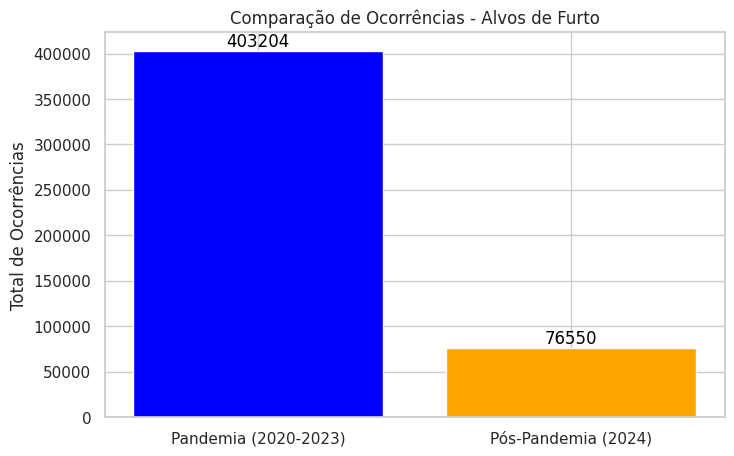

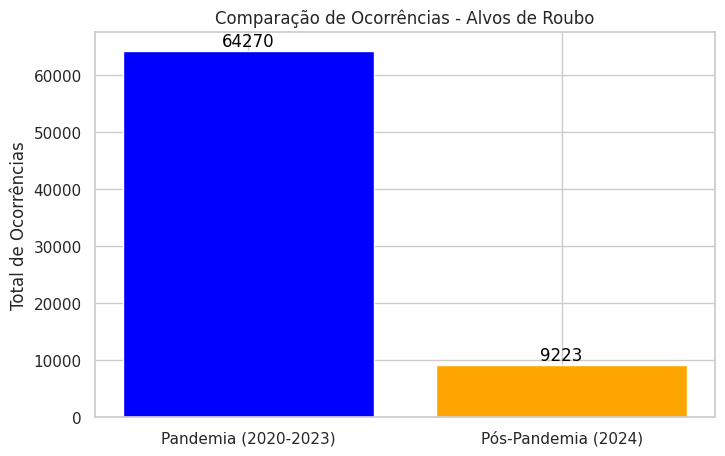

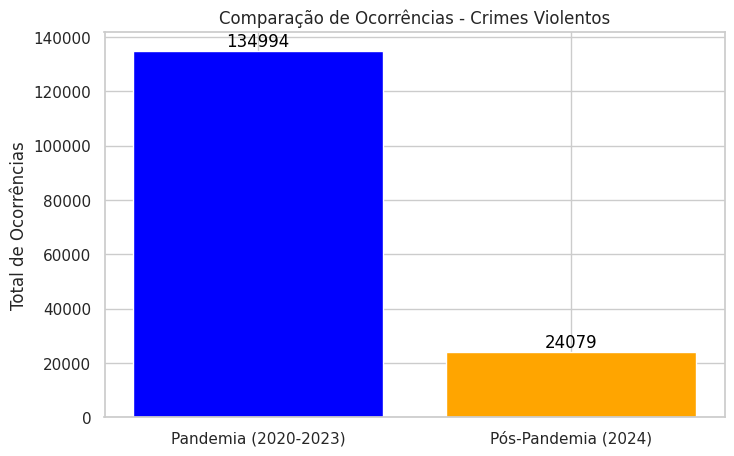

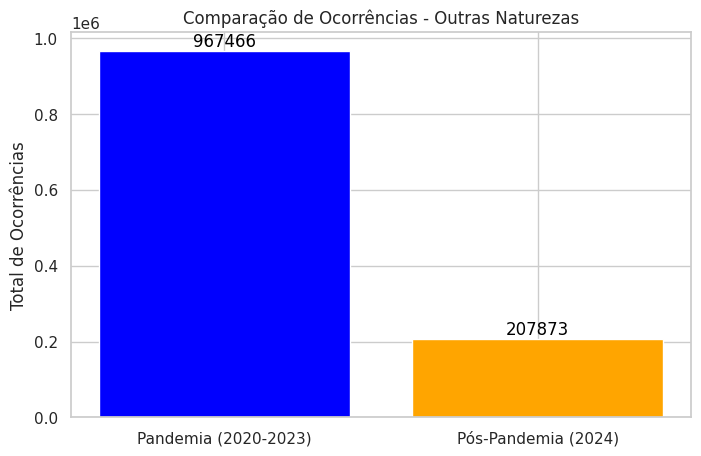

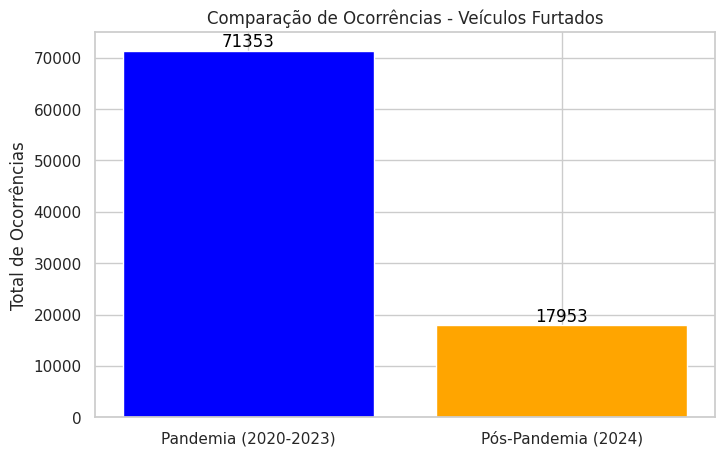

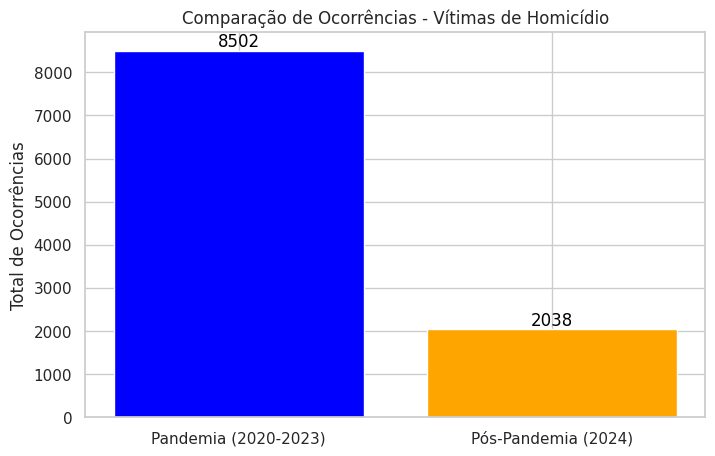

In [ ]:
# Função para calcular a soma total de registros por período
def calcular_soma_periodos(dataset, periodo_inicio, periodo_fim):
    dados_periodo = dataset[(dataset['Data'] >= periodo_inicio) & (dataset['Data'] <= periodo_fim)]
    return dados_periodo['Registros'].sum()  # Soma de registros no período

# Função para plotar o gráfico de comparação
def comparar_periodos_geral(nome_dataset, dataset):
    # Total de ocorrências no período da pandemia
    total_pandemia = calcular_soma_periodos(dataset, periodo_pandemia_inicio, periodo_pandemia_fim)
    # Total de ocorrências no período pós-pandemia
    total_pos_pandemia = calcular_soma_periodos(dataset, periodo_pos_pandemia_inicio, periodo_pos_pandemia_fim)

    # Criar o gráfico de barras para os totais
    plt.figure(figsize=(8, 5))
    barras = plt.bar(['Pandemia (2020-2023)', 'Pós-Pandemia (2024)'],
                     [total_pandemia, total_pos_pandemia], color=['blue', 'orange'])

    # Adicionar rótulos no topo de cada barra
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontsize=12, color='black')

    # Configurações do gráfico
    plt.ylabel('Total de Ocorrências')
    plt.title(f'Comparação de Ocorrências - {nome_dataset}')
    plt.show()

# Executar a função para cada dataset (excluindo Veículos Roubados, conforme necessário)
comparar_periodos_geral("Alvos de Furto", alvos_furto)
comparar_periodos_geral("Alvos de Roubo", alvos_roubo)
comparar_periodos_geral("Crimes Violentos", crimes_violentos)
comparar_periodos_geral("Outras Naturezas", outras_naturezas)
comparar_periodos_geral("Veículos Furtados", veiculos_furtados)
comparar_periodos_geral("Vítimas de Homicídio", vitimas_homicidio)

#12: Calcular e Comparar Ocorrências para Cidades Específicas (Belo Horizonte, Uberlândia, e Contagem)

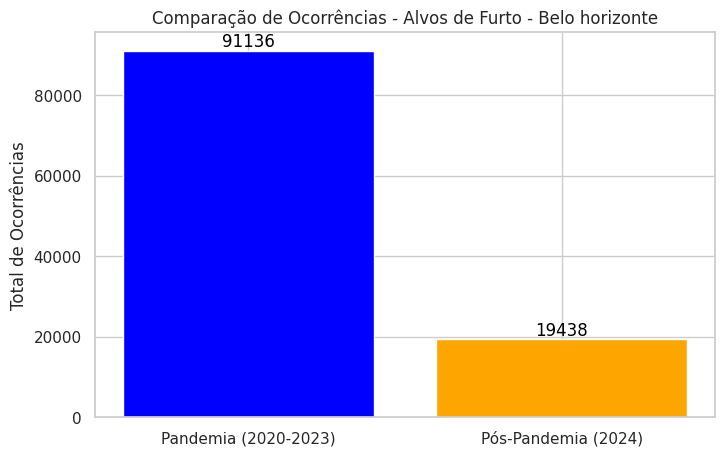

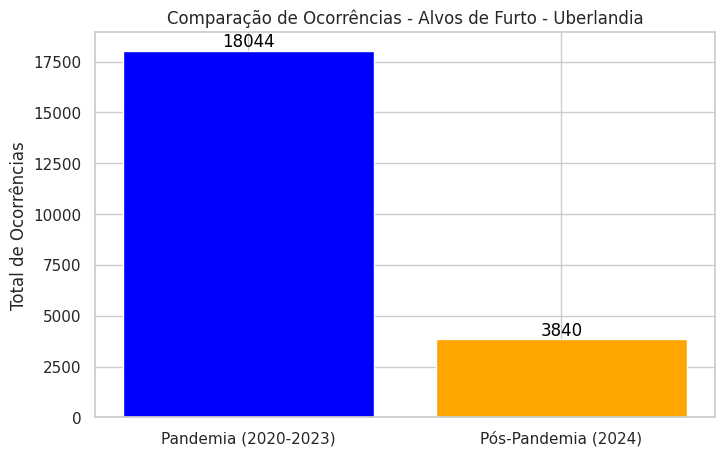

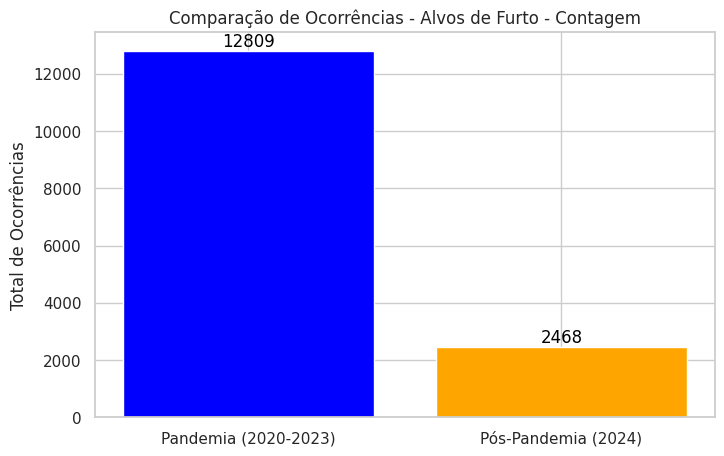

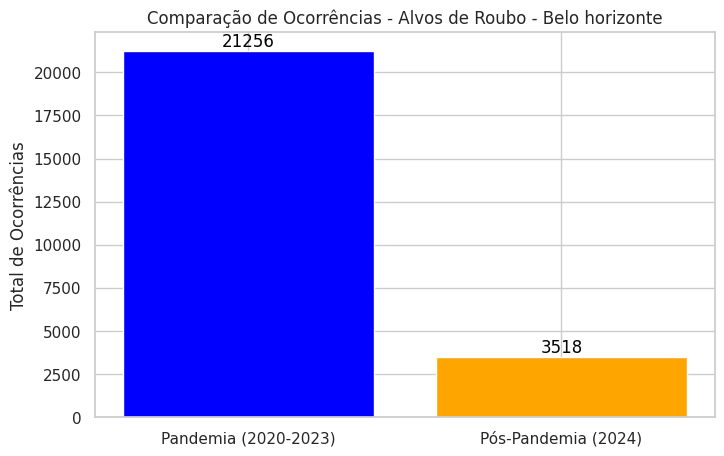

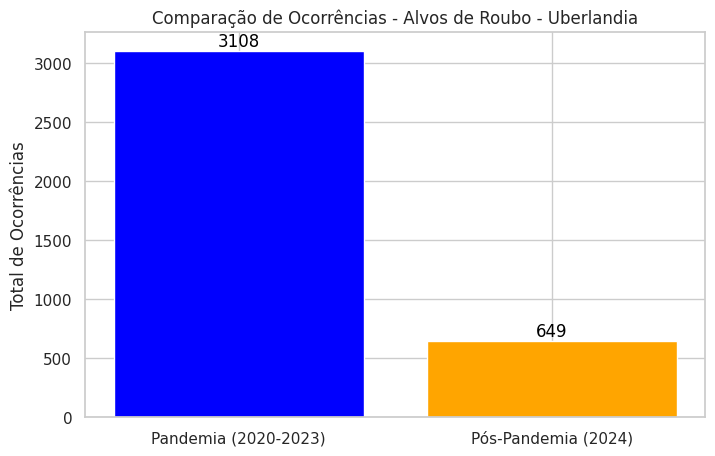

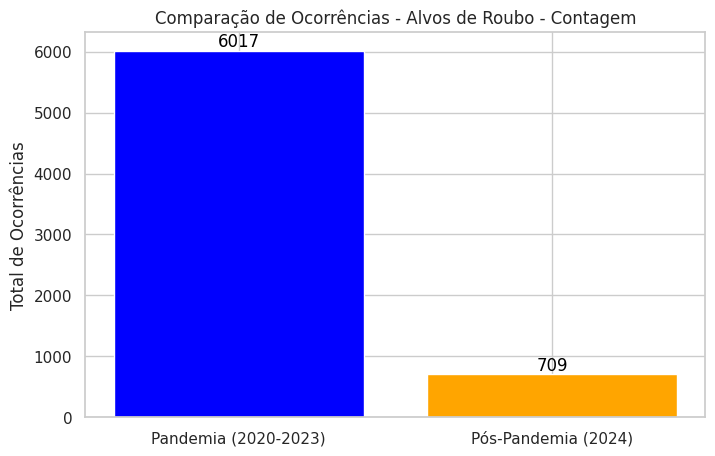

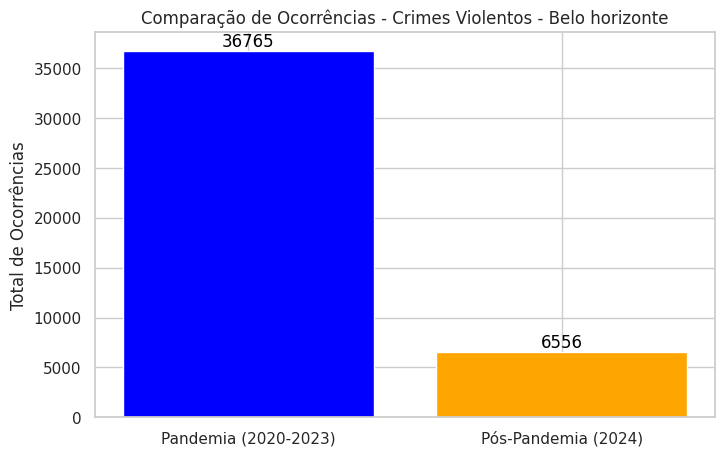

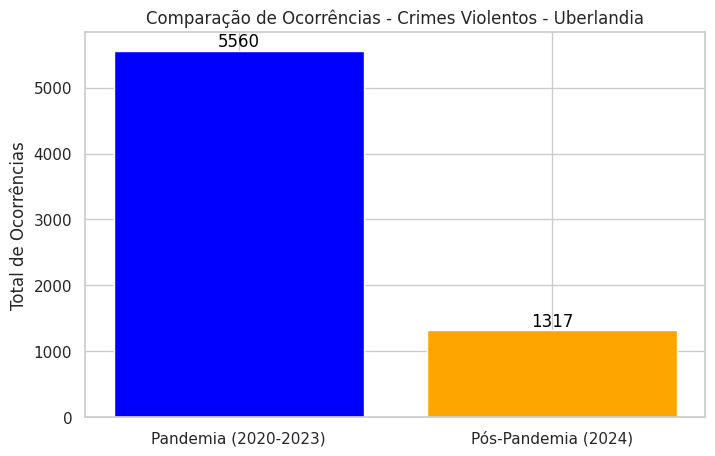

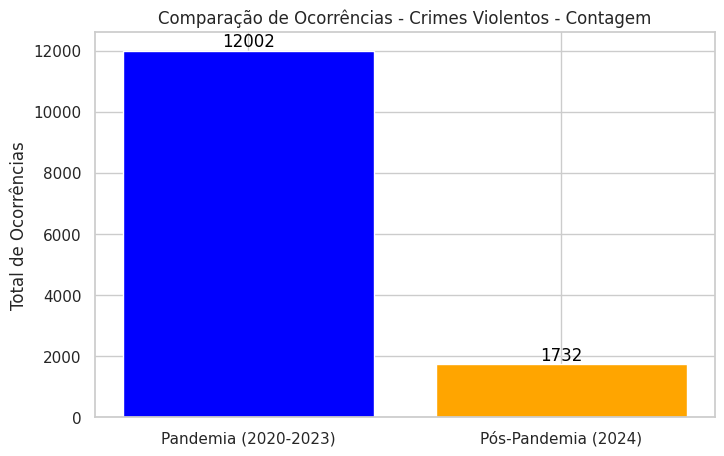

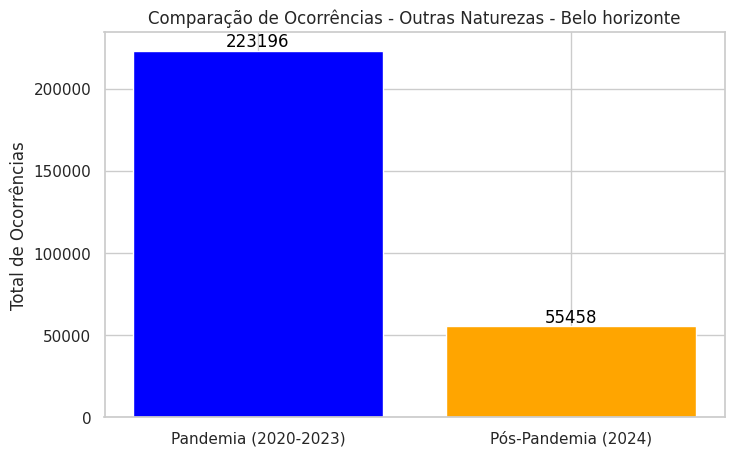

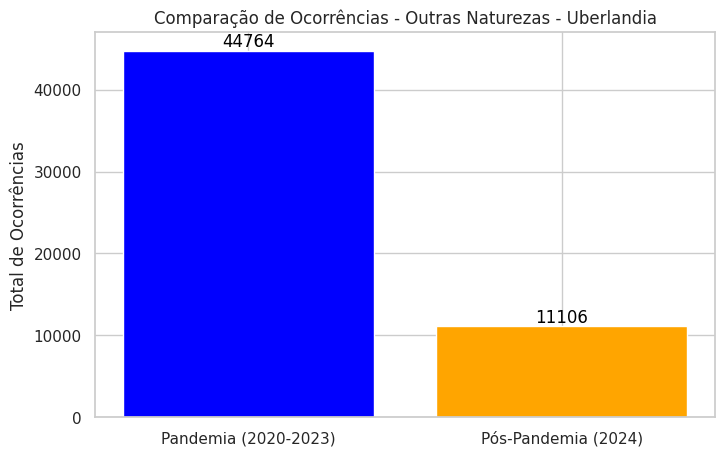

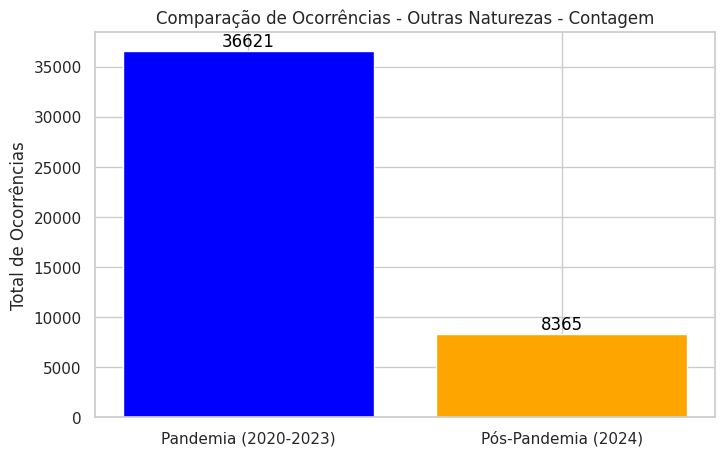

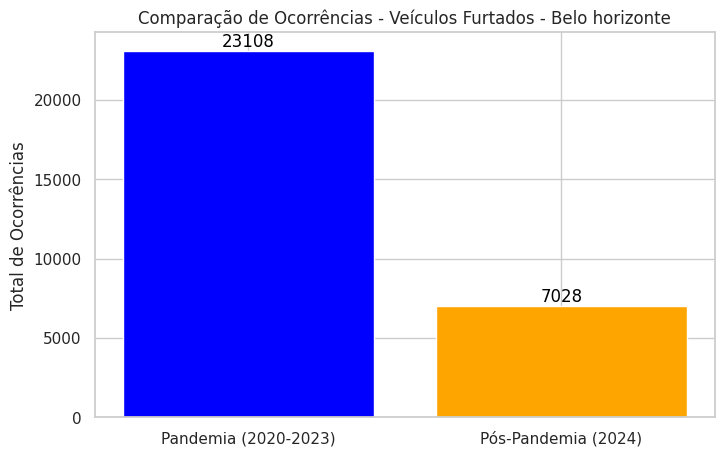

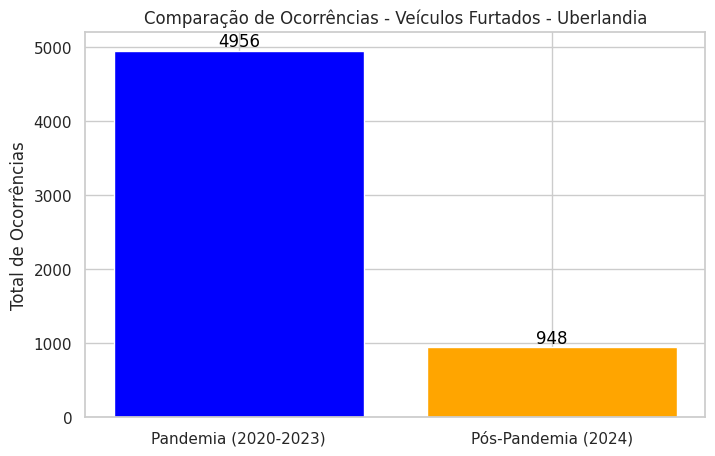

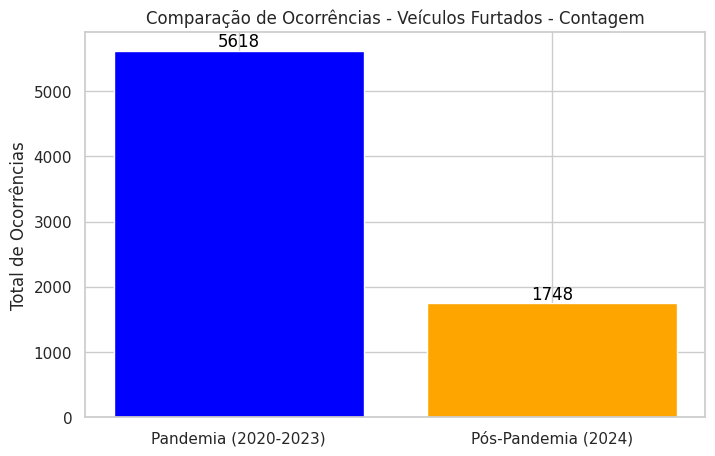

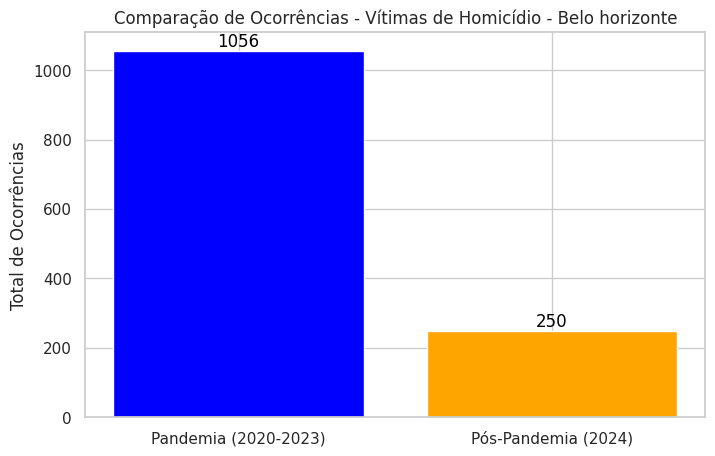

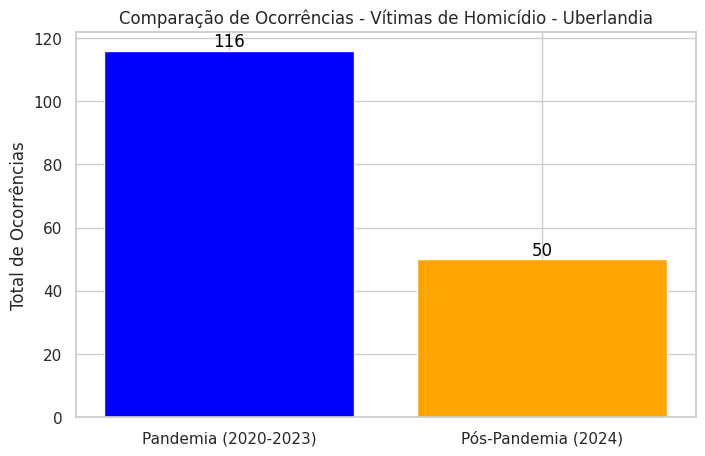

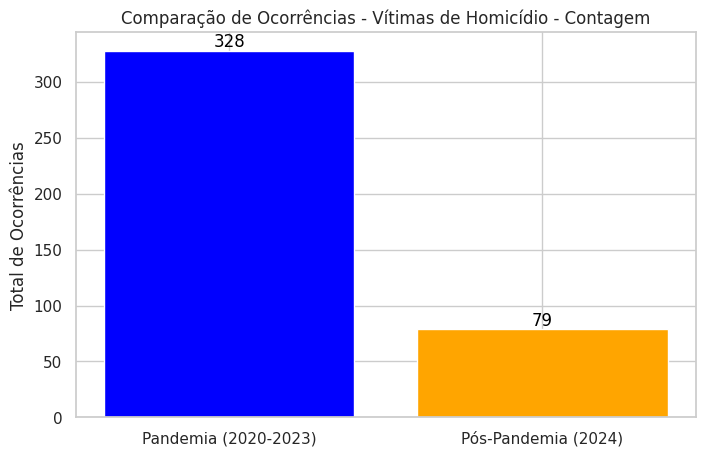

In [ ]:
# Definir as cidades de interesse
cidades_interesse = ["BELO HORIZONTE", "UBERLANDIA", "CONTAGEM"]

# Função para calcular a soma de registros por cidade e período
def calcular_soma_por_cidade(dataset, cidade, periodo_inicio, periodo_fim):
    dados_cidade = dataset[(dataset['Município'].str.upper() == cidade) &
                           (dataset['Data'] >= periodo_inicio) &
                           (dataset['Data'] <= periodo_fim)]
    return dados_cidade['Registros'].sum()

# Função para gerar gráficos comparativos por cidade e dataset
def comparar_periodos_por_cidade_dataset(nome_dataset, dataset, cidade):
    # Total de ocorrências no período da pandemia
    total_pandemia = calcular_soma_por_cidade(dataset, cidade, periodo_pandemia_inicio, periodo_pandemia_fim)
    # Total de ocorrências no período pós-pandemia
    total_pos_pandemia = calcular_soma_por_cidade(dataset, cidade, periodo_pos_pandemia_inicio, periodo_pos_pandemia_fim)

    # Criar o gráfico de barras para os totais
    plt.figure(figsize=(8, 5))
    barras = plt.bar(['Pandemia (2020-2023)', 'Pós-Pandemia (2024)'],
                     [total_pandemia, total_pos_pandemia], color=['blue', 'orange'])

    # Rótulos no topo de cada barra
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontsize=12, color='black')

    # Configurações do gráfico
    plt.ylabel('Total de Ocorrências')
    plt.title(f'Comparação de Ocorrências - {nome_dataset} - {cidade.capitalize()}')
    plt.show()

# Lista dos datasets com os nomes associados
datasets = [
    ("Alvos de Furto", alvos_furto),
    ("Alvos de Roubo", alvos_roubo),
    ("Crimes Violentos", crimes_violentos),
    ("Outras Naturezas", outras_naturezas),
    ("Veículos Furtados", veiculos_furtados),
    ("Vítimas de Homicídio", vitimas_homicidio)
]

# Executar a função para cada dataset e cidade de interesse
for nome_dataset, dataset in datasets:
    for cidade in cidades_interesse:
        comparar_periodos_por_cidade_dataset(nome_dataset, dataset, cidade)



# MARCHINE LEARNING - Random Forest Classifier

In [ ]:
# Instanciar e treinar o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Codificação das variáveis categóricas
label_encoder = LabelEncoder()
dados_completo['Município'] = label_encoder.fit_transform(dados_completo['Município'])
dados_completo['Natureza'] = label_encoder.fit_transform(dados_completo['Natureza'])
dados_completo['RISP'] = label_encoder.fit_transform(dados_completo['RISP'])

# Definição de X e y
X = dados_completo.drop(columns=['Tipo de Crime', 'Data'])
y = dados_completo['Tipo de Crime']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Previsão e avaliação
y_pred = model_rf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.9615716135515915
F1-Score: 0.9438310910058342
Matriz de Confusão:
 [[119685      0      0      0      0      0]
 [     0  26229      0      0      0      0]
 [     0      0  52251      0      0      0]
 [     0      0      0 119433      0      0]
 [ 19884      0      0      0      0      0]
 [     0      0      0      0      0 179948]]


# Validação Cruzada - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, make_scorer
import numpy as np

# Codificar as variáveis categóricas
label_encoder = LabelEncoder()
dados_completo['Município'] = label_encoder.fit_transform(dados_completo['Município'])
dados_completo['Natureza'] = label_encoder.fit_transform(dados_completo['Natureza'])
dados_completo['RISP'] = label_encoder.fit_transform(dados_completo['RISP'])

# Codificar a variável alvo (y) para que as classes fiquem numéricas e compatíveis para o modelo
y = LabelEncoder().fit_transform(dados_completo['Tipo de Crime'])

# Definir X (features)
X = dados_completo.drop(columns=['Tipo de Crime', 'Data'])

# Configuração do modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Configuração da validação cruzada com 5 folds estratificados
cv = StratifiedKFold(n_splits=3)
scoring = make_scorer(f1_score, average='weighted')

# Executar a validação cruzada e calcular o F1-Score para cada fold
f1_scores = cross_val_score(model_rf, X, y, cv=cv, scoring=scoring, n_jobs=-1)

# Exibir resultados
print("F1-Score por fold:", f1_scores)
print("F1-Score médio:", np.mean(f1_scores))
print("Desvio Padrão do F1-Score:", np.std(f1_scores))





F1-Score por fold: [0.94362018 0.94362018 0.86989913]
F1-Score médio: 0.919046494439208
Desvio Padrão do F1-Score: 0.03475243662788759


# MARCHINE LEARNING - K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)  # Aqui usei 5 vizinhos como parâmetro padrão
model_knn.fit(X_train, y_train)

# Previsão e avaliação do modelo
y_pred_knn = model_knn.predict(X_test)
print("Acurácia (KNN):", accuracy_score(y_test, y_pred_knn))
print("F1-Score (KNN):", f1_score(y_test, y_pred_knn, average='weighted'))
print("Matriz de Confusão (KNN):\n", confusion_matrix(y_test, y_pred_knn))


Acurácia (KNN): 0.9532226581373325
F1-Score (KNN): 0.9417787186194891
Matriz de Confusão (KNN):
 [[115445      0    563      9   3664      4]
 [     0  26227      0      0      0      2]
 [   375      0  51735     96      3     42]
 [    13      0    313 119060      1     46]
 [ 18504      0      3      0   1377      0]
 [    67      3    301    191      4 179382]]


# Validação Cruzada - K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definir o grid de parâmetros para o KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11, 13]}  # Testa diferentes valores de k

# GridSearchCV com validação cruzada (5 folds)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Exibir o melhor valor de k e a acurácia correspondente na validação cruzada
print("Melhor parâmetro para KNN:", grid_knn.best_params_)
print("Melhor acurácia na validação cruzada (KNN):", grid_knn.best_score_)

# Avaliação do modelo otimizado no conjunto de teste
best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
print("Acurácia com melhor modelo (KNN):", accuracy_score(y_test, y_pred_best_knn))
print("F1-Score com melhor modelo (KNN):", f1_score(y_test, y_pred_best_knn, average='weighted'))
print("Matriz de Confusão com melhor modelo (KNN):\n", confusion_matrix(y_test, y_pred_best_knn))


Melhor parâmetro para KNN: {'n_neighbors': 9}
Melhor acurácia na validação cruzada (KNN): 0.9530158443919682
Acurácia com melhor modelo (KNN): 0.9543783700210656
F1-Score com melhor modelo (KNN): 0.9403839758755973
Matriz de Confusão com melhor modelo (KNN):
 [[117278      0    778      9   1618      2]
 [     0  26225      0      0      0      4]
 [   563      0  51483    137      3     65]
 [    23      0    438 118909      1     62]
 [ 18987      0      6      1    890      0]
 [    90      4    496    313      6 179039]]


# MARCHINE LEARNING -   Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Escalar os dados e treinar o modelo usando um pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=300, solver='saga', C=0.1, class_weight='balanced', random_state=42))
pipeline.fit(X_train, y_train)

# Previsão e avaliação do modelo
y_pred_lr = pipeline.predict(X_test)
print("Acurácia (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("F1-Score (Logistic Regression):", f1_score(y_test, y_pred_lr, average='weighted'))
print("Matriz de Confusão (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Acurácia (Logistic Regression): 0.42877877200780784
F1-Score (Logistic Regression): 0.40155258845189395
Matriz de Confusão (Logistic Regression):
 [[ 15697      0   2053      0  14276  87659]
 [     0  26229      0      0      0      0]
 [  5892      0  19386  14825   5987   6161]
 [     0      0   1311 118122      0      0]
 [  3124      0    255      0   3133  13372]
 [ 30601      0  10822  55002  44227  39296]]


# Validação Cruzada - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Definir o pipeline com escalador e modelo de Regressão Logística
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='saga', random_state=42, class_weight='balanced'))

# Grid de parâmetros para a validação cruzada no pipeline
param_grid_lr = {
    'logisticregression__C': [0.1],  # Testando diferentes valores para C
    'logisticregression__max_iter': [300]  # Testando com um número maior de iterações
}

# Configurar o GridSearchCV com o pipeline e validação cruzada
grid_lr = GridSearchCV(pipeline, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Exibir o melhor parâmetro encontrado e a acurácia correspondente na validação cruzada
print("Melhor parâmetro para Logistic Regression:", grid_lr.best_params_)
print("Melhor acurácia na validação cruzada (Logistic Regression):", grid_lr.best_score_)

# Avaliação do modelo otimizado no conjunto de teste
best_lr = grid_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
print("Acurácia com melhor modelo (Logistic Regression):", accuracy_score(y_test, y_pred_best_lr))
print("F1-Score com melhor modelo (Logistic Regression):", f1_score(y_test, y_pred_best_lr, average='weighted'))
print("Matriz de Confusão com melhor modelo (Logistic Regression):\n", confusion_matrix(y_test, y_pred_best_lr))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Melhor parâmetro para Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 300}
Melhor acurácia na validação cruzada (Logistic Regression): 0.4258790663450866
Acurácia com melhor modelo (Logistic Regression): 0.42877877200780784
F1-Score com melhor modelo (Logistic Regression): 0.40155258845189395
Matriz de Confusão com melhor modelo (Logistic Regression):
 [[ 15697      0   2053      0  14276  87659]
 [     0  26229      0      0      0      0]
 [  5892      0  19386  14825   5987   6161]
 [     0      0   1311 118122      0      0]
 [  3124      0    255      0   3133  13372]
 [ 30601      0  10822  55002  44227  39296]]
